#### The TESS mission
The TESS telescope observes stars for long periods of time, just under a month per sector. By doing so, TESS observes how the brightness of a star changes over time. Not all data for the stars in a given sector is recorded. Instead, pixels are selected around particular targeted stars. These cut-out images are called **Target Pixel Files, or TPFs**.

**TPFs** can be thought of as stacks of images, with one image for every time stamp. Each time stamp is referred to as a cadence. The TPF images are cut-out postage stamps of the full CCD observations, making them easier to work with. TPFs also include information about the astronomical background to the image, which is removed from the raw flux, and the aperture used to compute the aperture photometry of your target.

Mind the difference with the full-frame images **(FFIs)**. A single FFI is the complete set of all science and collateral pixels across all CCDs of a given camera. FFIs were taken every 1800 seconds during science operations in the primary mission, every 600 seconds during the first extended mission, and every 200 seconds during the second extended mission.
__________________

Космический телескоп TESS наблюдает звезды в течение длительных периодов, примерно месяц на сектор. Он измеряет изменения яркости звезды со временем. 

Не все данные по звездам записываются, вместо этого выбираются пиксели вокруг целевых звезд и создаются файлы с изображениями, называемые целевыми файловыми пикселями (TPF). 

Эти TPF можно представить как последовательность изображений для каждого временного отметки. В файлах TPF также удаляется астрономический фон из изображения и используется апертура для вычисления фотометрии апертуры вашей цели. 

В отличие от них, полноформатные изображения (FFI) содержат полный набор пикселей всех детекторов камеры и снимались каждые 1800 секунд в первичной миссии и через каждые 600 и 200 секунд в расширенных миссиях.

### **TESS Data Products**

The TESS data processing pipeline is being developed by the Science Processing Operations Center (SPOC) at NASA Ames Research Center. Building on the legacy of the Kepler data processing pipeline, SPOC produces Target Pixel Files and Light Curve Files. For more information, please visit the Documentation page.

Full Frame Images (FFIs) are processed by the Quick-Look Pipeline (QLP) at the TESS Science Office (TSO). The QLP performs multi-aperture photometry to extract light curves for all targets within the FFIs that are brighter than a TESS magnitude of **T = 13.5 mag**.

### **Available TESS Data Products:**

1. **Target Pixel File**:  
   Stored as `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_tp.fits`.

2. **Light Curve File**:  
   Stored as `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_lc.fits`.

### **File Naming Conventions:**

- **{date-time}**: The time-stamp associated with the file, formatted as `yyyydddhhmmss`.
- **{sctr}**: A four-digit, zero-padded integer indicating the sector where data was collected, starting with Sector 1.
- **{tid}**: A zero-padded, 16-digit target identifier that refers to an object in the TESS Input Catalog.
- **{scid}**: A four-digit, zero-padded identifier of the spacecraft configuration map used for data processing.
- **{cr}**: A string character representing the cosmic ray mitigation procedure.

**Note:** The names of the files differ in the last two letters before the extension: `_tp.fits` for Target Pixel Files and `_lc.fits` for Light Curve Files. Light Curve Files are derived from the data in the TPFs; hence, they share the same name.

For additional information on TESS data products and access instructions, refer to **Section 6 - Data Search Tutorials** of the TESS Archive Documentation Center.
_____________
**Продукты данных TESS**

Пайплайн обработки данных TESS в настоящее время разрабатывается Центром операций по науке (SPOC) в Исследовательском центре NASA Ames. Он основан на наследии пайплайна обработки данных Kepler. SPOC производит файлы пикселей целей и файлы кривых блеска. Дополнительную информацию можно найти на странице документации.

Полноразмерные изображения обрабатываются в TESS Science Office (TSO) с помощью пайплайна Quick-Look Pipeline (QLP). QLP выполняет многоапертурную фотометрию для извлечения кривых блеска всех объектов в FFIs, которые ярче величины TESS T = 13,5 mag.

Доступные продукты данных TESS описаны в официальном документе продуктов данных TESS. Нас интересуют следующие продукты данных:

- **Target Pixel File**: хранится как `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_tp.fits`.
- **Light Curve File**: хранится как `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_lc.fits`.

**Где:**
- `{date-time}`: метка времени, связанная с этим файлом, в формате `yyyydddhhmmss`.
- `{sctr}`: четырехзначное целое число с ведущими нулями, указывающее сектор, в котором данные были собраны, начиная с Сектора 1.
- `{tid}`: шестнадцатизначный идентификатор цели с ведущими нулями, ссылающийся на объект в Входном каталоге TESS.
- `{scid}`: четырехзначный идентификатор конфигурационной карты космического аппарата с ведущими нулями, использованной для обработки этих данных.
- `{cr}`: символьная строка, обозначающая процедуру смягчения воздействия космических лучей.

Обратите внимание, как отличаются названия двух файлов на последние две буквы перед расширением: `_tp.fits` для файла пикселей целей и `_lc.fits` для файла кривой блеска. Файлы кривых блеска создаются с использованием данных из файлов TPFs; по этой причине они имеют одинаковое имя.



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#%matplotlib notebook
%matplotlib widget 
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
sector49_tpf = 'tess2022057073128-s0049-0000000198108326-0221-s_tp.fits'
sector49_lcf = 'tess2022057073128-s0049-0000000198108326-0221-s_lc.fits'

sector23_tpf = 'tess2020078014623-s0023-0000000198108326-0177-s_tp.fits'
sector23_lcf = 'tess2020078014623-s0023-0000000198108326-0177-s_lc.fits'

sector50_tpf = 'tess2022085151738-s0050-0000000198108326-0222-s_tp.fits'
sector50_lcf = 'tess2022085151738-s0050-0000000198108326-0222-s_lc.fits'

sector76_tpf = 'tess2024058030222-s0076-0000000198108326-0271-s_tp.fits'
sector76_lcf = 'tess2024058030222-s0076-0000000198108326-0271-s_lc.fits'

sector77_tpf = 'tess2024085201119-s0077-0000000198108326-0272-s_tp.fits'
sector77_lcf = 'tess2024085201119-s0077-0000000198108326-0272-s_lc.fits'

#### Contents of Target Pixel File

Now that we have the file, we can now explore its contents. A FITS file comprises segments called Header/Data Units (HDUs), where the first HDU is called the `Primary HDU` or `Primary Array`. The target pixel file contains four extensions: a PRIMARY header, a PIXELS extension, an APERTURE extension and a TARGET COSMIC RAY extension.
*   **No. 0 (Primary):**  
    This HDU contains meta-data related to the entire file.
    
*   **No. 1 (Pixels):**  
    This HDU contains a binary table with 11 columns containing a time series of scalar values or images.
    
*   **No. 2 (Aperture):**  
    This HDU contains an image that gives information about each pixel and how it was used by the TESS pipeline in the data processing.
    
*   **No. 3 (Target Cosmic Ray):**  
    This HDU is new in the TESS target pixel files and describes the cosmic rays identified and subtracted from the target pixels. These cosmic ray corrections are only available if the TESS Pipeline cosmic ray correction algorithm was enabled during processing.
    

In [ ]:
fits.info(sector49_tpf)

Filename: tess2022057073128-s0049-0000000198108326-0221-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   19331R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [5]:
# With this command we open the fits file
tpf_hdu = fits.open(sector49_tpf)
#tpf_hdu[0].header
print(tpf_hdu[0].data)

None


### Contents of the PIXELS extension
The pixels extension contains raw and calibrated pixels collected by the spacecraft at a 2-minute cadence. Here is a summary of the columns available in that extension.
*   **TIME**: Time of mid-cadence stored in BJD-2457000.0.
    
*   **CADENCENO**: Cadence number
    
*   **RAW_CNTS**: The raw counts per pixel before any processing.
    
*   **FLUX**: The calibrated background-subtracted pixels for each cadence.
    
*   **FLUX_BKG**: The background measured and removed for these pixels.
    
*   **QUALITY**: Quality flags.
    
*   **POS_CORR1 & POS_CORR2**: The (column,row) local motion of the star calculated from the motion polynomials. Motion polynomials are calculated from the PSF centroids of selected stars on each CCD.
    
We can use the `columns` method to explore the content of a specific HDU. In this case, we explore the second HDU.

In [ ]:
tpf_hdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

the information stored in the header of the FITS file to display the **position of our target in the Equatorial System reference frame** (i.e., Right Ascension and Declination) using the World Coordinate System through the [`astropy`](https://www.astropy.org/) package. This is possible only if the FITS header contains the [proper keys to perform this transformation](https://fits.gsfc.nasa.gov/fits_wcs.html)!


If you want to compare this image with the one in Simbad, keep in mind these important facts:

* In this plot, the RA is increasing from left to right, while RA is measured from right to left (in a counterclockwise sense). This difference is due to the orientation of the CCD

* TESS is oriented with respect to the ecliptic so that the frame will appear with some rotation in the equatorial reference system

* TESS has a pixel scale of 21 arcsecond per pixel, while Simbad (and TASTE) images have much higher resolution

In [6]:
#Plot the first image of the FLUX Column with WCS overlay.
tpf_data = tpf_hdu[1].data
# print(tpf_data) 

sector49_bjdtdb = tpf_data['TIME'] + 2457000.0
# print(sector44_bjdtdb)

first_image = tpf_data['FLUX'][0]
# print(np.shape(tpf_data['FLUX']))

#The aperture extension header contains the same WCS as that in the Pixels extension
wcs = WCS(tpf_hdu[2])

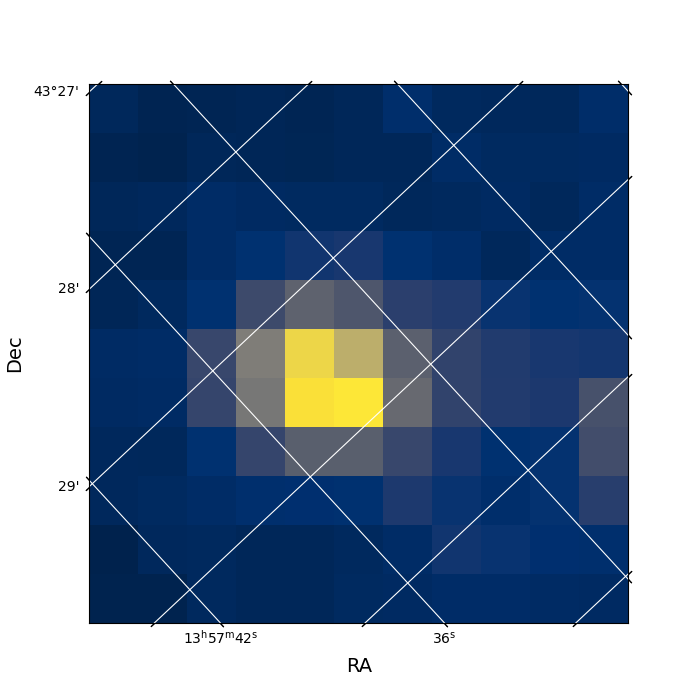

In [8]:
#Plot the first image in the file.
fig = plt.figure(figsize = (7,7))
fig.add_subplot(111, projection = wcs)
plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 14)
plt.ylabel(r'Dec', fontsize = 14)
plt.grid(axis = 'both', color = 'white', ls = 'solid')

plt.show()

**the same plot for another sector**, this time adding a colorbar. 
Note how the rotation of the image is changing from sector to sector.

Note If your plot is white, it may be possible that the observations at the beginning of the sector are corrupted or not available. You may iterate over the images until you find one where the values are not inf or nan

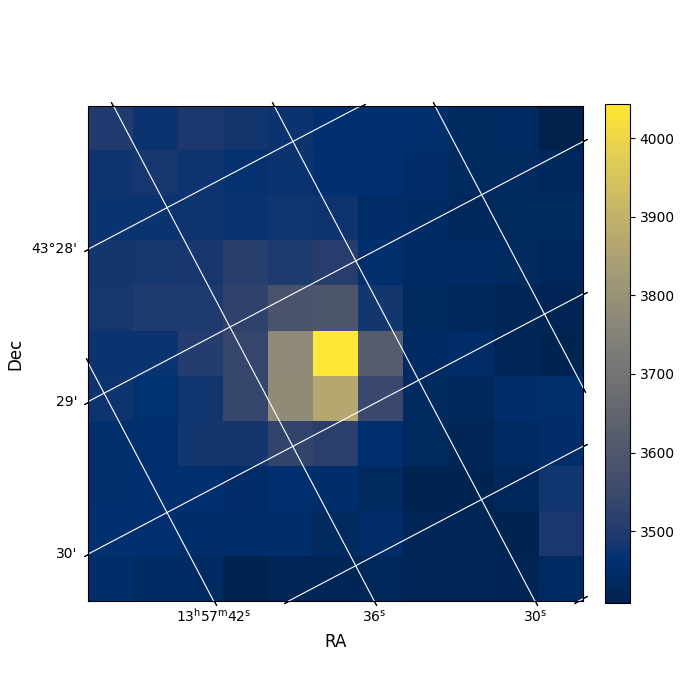

In [9]:
#Plot the first image of the FLUX Column with WCS overlay.
tphdu = fits.open(sector23_tpf)
tpf_data = tphdu[1].data

for i_check in range(0, len(tpf_data['TIME'])):
    if np.isfinite(tpf_data['FLUX'][i_check][0,0]):
      break


first_image = tpf_data['FLUX'][i_check]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111,projection=wcs)
im = plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 12)
plt.ylabel(r'Dec', fontsize = 12)
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

### Displaying The Aperture Pixel Information
Let's read in the second FITS extension HDU to display the aperture information. First, let's read in the aperture pixels from the HDU.



In [10]:
ap_image = (tphdu[2].data)
print(ap_image)
# https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview#id-2.0DataProductOverview-Table:ApertureMaskImageFlags

[[65 69 69 69 69 69 65 65 69 65 65]
 [69 69 65 65 65 69 65 65 69 65 65]
 [69 69 65 65 65 65 65 69 69 65 65]
 [65 65 65 65 75 75 65 65 69 65 65]
 [65 65 65 75 75 75 75 65 69 65 65]
 [69 65 65 75 75 75 75 65 65 65 65]
 [65 65 65 75 75 75 75 65 65 69 65]
 [69 65 65 65 65 65 65 65 69 69 65]
 [69 69 65 65 65 65 65 65 69 69 65]
 [69 69 69 69 65 65 65 69 69 69 65]
 [65 65 65 65 65 65 65 65 65 65 65]]


We see the pixel values are integers, but what do they mean?

The pixels are **bitmasks** that encode information about each pixel. A bitmask is a base-2 (or binary) number where each figure (or bit) identifies a value: `False` if the bit is `00`, `True` if the bit is `11`. 

For example, a pixel with an aperture value equal to 75 can be broken down into a sum of powers of two:

\[ 75 = 64 + 8 + 2 + 1 = 2^6 + 2^3 + 2^1 + 2^0 = 1001011 \]

Reading the binary number from right to left, `1001011` means that Conditions **0**, **1**, **3**, and **6** are `True`, and all the other conditions are `False`. 

To know the actual meaning of these conditions, we consult the table of Aperture Mask Image Flags defined by the TESS team. In this specific case, the conditions being true are:

1. Pixel was collected by the spacecraft.
2. Pixel was in the optimal photometric aperture to calculate `SAP_FLUX`.
3. Pixel was used to calculate the flux-weighted centroid.
4. Pixel is on CCD output B.

All other conditions in the table are `False`.

`Numpy` has a built-in function that can convert an integer into a binary bitmask. Let's use that on one of the values we see in our displayed image above.

In [12]:
np.binary_repr(75)

np.binary_repr(69)


'1000101'

In [13]:
bitwise_and_result = np.bitwise_and(129, 139)
binary_result  = np.binary_repr(bitwise_and_result)
print(bitwise_and_result, binary_result)

129 10000001


### Plot the aperture bitmask

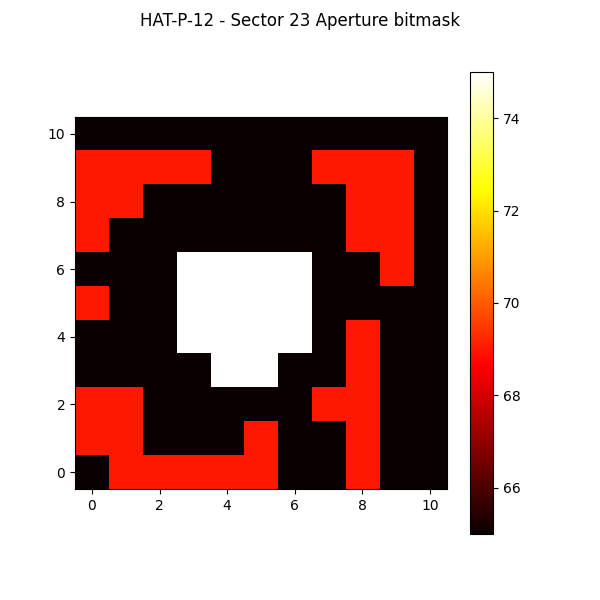

In [15]:
tphdu = fits.open(sector23_tpf)
aperture = tphdu[2].data

# Start figure and axis.
fig, ax = plt.subplots(figsize=(6,6))

cbx = ax.imshow(aperture, cmap=plt.cm.hot, origin="lower", alpha=1.0)

# Let's define a title for the figure.
fig.suptitle("HAT-P-12 - Sector 23 Aperture bitmask")

# Add a color bar.
cbar = fig.colorbar(cbx)
plt.show()